In [1]:
!pip install --upgrade kagglehub==0.3.6 scikit-learn xgboost tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 226.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.5
    Uninstalling kagglehub-0.3.5:
      Successfully uninstalled kagglehub-0.3.5
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns
import kagglehub

In [23]:
# Download the GTZAN dataset from Kaggle
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")
print("Path to dataset files:", path)

# Construct the path to the actual CSV file inside the "Data" folder
csv_file = os.path.join(path, 'Data', 'features_3_sec.csv')

# Check if the CSV file exists and load it
if os.path.exists(csv_file):
    try:
        df = pd.read_csv(csv_file)
        print("Dataset successfully loaded.")
        print("Dataset shape:", df.shape)
        print("Sample data:\n", df.head())
    except pd.errors.ParserError as e:
        print(f"Error parsing the CSV file: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
else:
    print(f"The file {csv_file} does not exist in the specified path.")

Path to dataset files: /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1
Dataset successfully loaded.
Dataset shape: (9990, 60)
Sample data:
             filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199 

In [24]:
# Drop the filename column if it exists
if 'filename' in df.columns:
    df = df.drop(columns=['filename'])

In [25]:
# Separate features and target
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values   # The last column (labels)

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
# pca = PCA(n_components=0.95)  # Keep 95% of variance
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# print(f"Reduced feature set shape after PCA: {X_train.shape}")

In [28]:
# Build the Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation='relu',),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation='relu',),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu',),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 512)                 │          30,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,338 (794.29 KB)

 Trainable params: 203,338 (794.29 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2, verbose=2)

Epoch 1/50
50/50 - 3s - 56ms/step - accuracy: 0.3333 - loss: 1.8729 - val_accuracy: 0.5109 - val_loss: 1.3441
Epoch 2/50
50/50 - 1s - 21ms/step - accuracy: 0.5162 - loss: 1.3518 - val_accuracy: 0.6610 - val_loss: 1.0344
Epoch 3/50
50/50 - 0s - 9ms/step - accuracy: 0.6050 - loss: 1.1254 - val_accuracy: 0.7148 - val_loss: 0.8675
Epoch 4/50
50/50 - 1s - 12ms/step - accuracy: 0.6612 - loss: 0.9883 - val_accuracy: 0.7342 - val_loss: 0.7961
Epoch 5/50
50/50 - 1s - 12ms/step - accuracy: 0.6953 - loss: 0.8909 - val_accuracy: 0.7642 - val_loss: 0.7165
Epoch 6/50
50/50 - 1s - 12ms/step - accuracy: 0.7272 - loss: 0.8106 - val_accuracy: 0.7730 - val_loss: 0.6813
Epoch 7/50
50/50 - 0s - 9ms/step - accuracy: 0.7478 - loss: 0.7531 - val_accuracy: 0.7874 - val_loss: 0.6260
Epoch 8/50
50/50 - 1s - 13ms/step - accuracy: 0.7707 - loss: 0.7001 - val_accuracy: 0.8030 - val_loss: 0.5929
Epoch 9/50
50/50 - 1s - 12ms/step - accuracy: 0.7813 - loss: 0.6456 - val_accuracy: 0.8118 - val_loss: 0.5551
Epoch 10/50


In [31]:
# Evaluate the Model
eval_results = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Loss: {eval_results[0]}\nTest Accuracy: {eval_results[1]}")

63/63 - 0s - 2ms/step - accuracy: 0.8954 - loss: 0.3965

Test Loss: 0.39648401737213135
Test Accuracy: 0.8953953981399536


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
               precision    recall  f1-score   support

       blues       0.93      0.91      0.92       200
   classical       0.92      0.99      0.95       199
     country       0.82      0.86      0.84       199
       disco       0.88      0.85      0.87       200
      hiphop       0.95      0.85      0.90       200
        jazz       0.91      0.89      0.90       200
       metal       0.97      0.93      0.95       200
         pop       0.92      0.86      0.89       200
      reggae       0.87      0.91      0.89       200
        rock       0.80      0.90      0.84       200

    accuracy                           0.90      1998
   macro avg       0.90      0.90      0.90      1998
weighted avg       0.90      0.90      0.90      1998



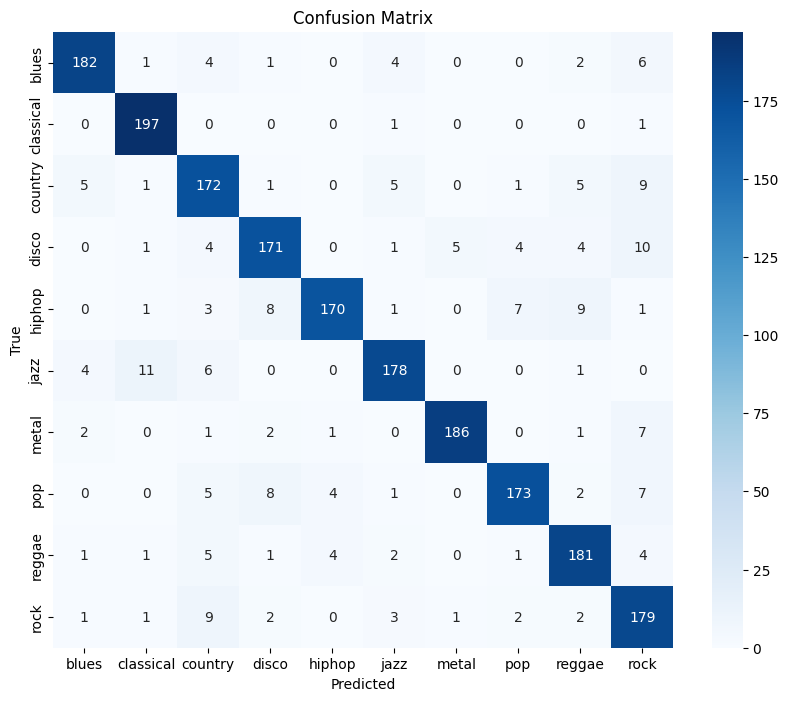

In [32]:
# Generate Classification Report and Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

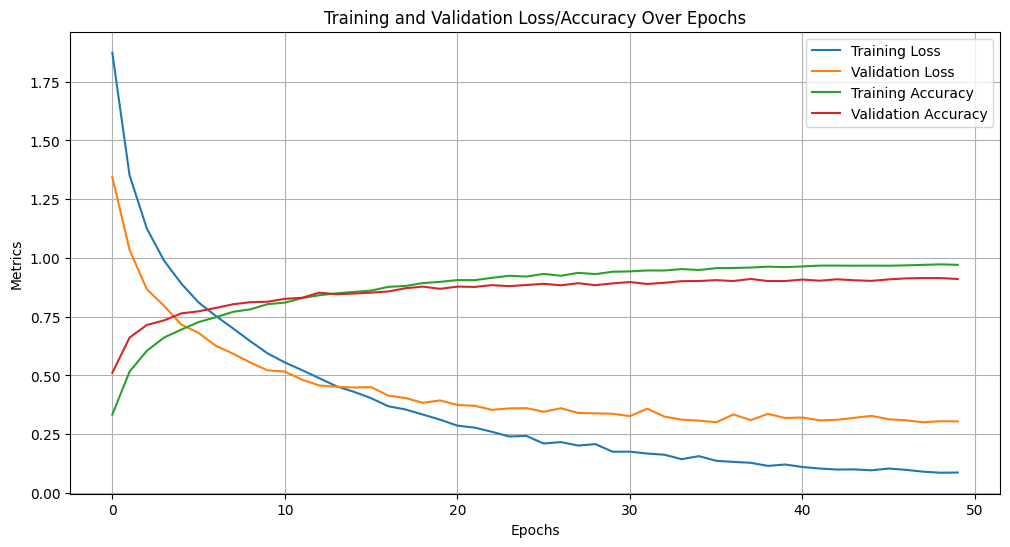

In [33]:
# Plot Training and Validation Metrics
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Loss/Accuracy Over Epochs')
plt.legend()
plt.grid()
plt.show()
